![Electron Diagram](comp_phys_e_diagram.jpg)
Because the charge is in the direct center and the charges are horizontally mirrored, the force will be pointing directly left.

In [4]:
# Part b
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# constants
k = 9E9 # Coulombs constant

# charges
# charge chaarcteristics: charge, xpos, ypos
q1 = [1E-9, np.array([0, 0])] # center charge is at 0,0
q2 = [2E-9, np.array([5E-3, 5E-3])]
q3 = [2E-9, np.array([5E-3, -5E-3])]
q4 = [-2E-9, np.array([-5E-3, 5E-3])]
q5 = [-2E-9, np.array([-5E-3, -5E-3])]

# use efield function, will use this later as well
def PointEField(q, pos_q, pos_o):

    r = pos_o - pos_q # distance between the point and the charge
    rmag =  np.linalg.norm(r) # magnitude of the distance

    # If the distance is zero, we are the point charge
    # just don't return anything
    if rmag <= 0:
        return (0,0)

    rhat = r / rmag # create the unit vector

    # E = kq1/r^2
    Emag = k * q / (rmag ** 2)

    # calculate the x and y components 
    Ex = Emag * rhat[0]
    Ey = Emag * rhat[1]

    # Return the two components as the function's outputs.
    return Ex,Ey

def PointEFieldArray(q, pos_q, pos_o):
    Ex,Ey = PointEField(q, pos_q, pos_o)
    return np.array([Ex, Ey])

# caluclate the net efield at 0,0
net_e_field = PointEFieldArray(q2[0], q2[1], q1[1]) + PointEFieldArray(q3[0], q3[1], q1[1]) + PointEFieldArray(q4[0], q4[1], q1[1]) + PointEFieldArray(q5[0], q5[1], q1[1]) 
# Fe = E * q
net_force_vector = net_e_field * q1[0]
net_force = np.linalg.norm(net_force_vector)
print(f"The net force on the middle charge is {net_force} Newtons, and the vector is {net_force_vector}")

The net force on the middle charge is 0.0010182337649086285 Newtons, and the vector is [-0.00101823  0.        ]


c. The vector tells use that the force is pointing directly left, because the x-component is negative and the y-component is negative. This agrees with the diagram I drew in part a. 

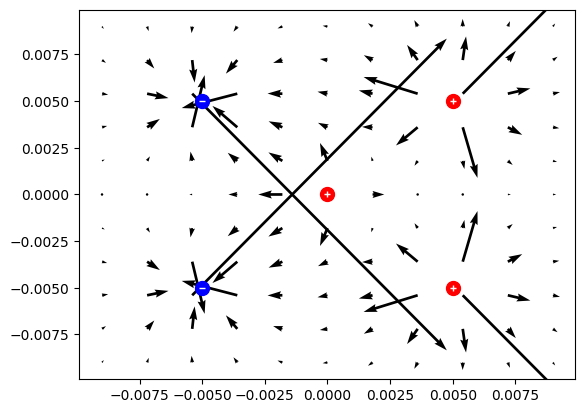

In [3]:
# Calculate the Efield

# create the grid
xlist = np.linspace(-.009, .009, 11)
ylist = np.linspace(-.009, .009, 11)
X,Y = np.meshgrid(xlist,ylist)

# define u and v with the dimensions of X and Y, filled with zeroes
Ex1 = np.zeros(X.shape)
Ey1 = np.zeros(Y.shape)

Ex2 = np.zeros(X.shape)
Ey2 = np.zeros(Y.shape)

Ex3 = np.zeros(X.shape)
Ey3 = np.zeros(Y.shape)

Ex4 = np.zeros(X.shape)
Ey4 = np.zeros(Y.shape)

Ex5 = np.zeros(X.shape)
Ey5 = np.zeros(Y.shape)

# loop over every point and set its value
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Ex1[i,j], Ey1[i,j] = PointEField(q1[0], q1[1], np.array([X[i,j], Y[i,j]]))
        Ex2[i,j], Ey2[i,j] = PointEField(q2[0], q2[1], np.array([X[i,j], Y[i,j]]))
        Ex3[i,j], Ey3[i,j] = PointEField(q3[0], q3[1], np.array([X[i,j], Y[i,j]]))
        Ex4[i,j], Ey4[i,j] = PointEField(q4[0], q4[1], np.array([X[i,j], Y[i,j]]))
        Ex5[i,j], Ey5[i,j] = PointEField(q5[0], q5[1], np.array([X[i,j], Y[i,j]]))

# define the net Efield
u = Ex1 + Ex2 + Ex3 + Ex4 + Ex5 
v = Ey1 + Ey2 + Ey3 + Ey4 + Ey5

# plot our graphs!
plt.quiver(X,Y,u,v)

plt.scatter(q1[1][0], q1[1][1], [100], color="red")
plt.scatter(q1[1][0], q1[1][1], [25], color="white", marker="+", linewidths=1)

plt.scatter(q2[1][0], q2[1][1], [100], color="red")
plt.scatter(q2[1][0], q2[1][1], [25], color="white", marker="+", linewidths=1)

plt.scatter(q3[1][0], q3[1][1], [100], color="red")
plt.scatter(q3[1][0], q3[1][1], [25], color="white", marker="+", linewidths=1)

plt.scatter(q4[1][0], q4[1][1], [100], color="blue")
plt.scatter(q4[1][0], q4[1][1], [25], color="white", marker="_", linewidths=1)

plt.scatter(q5[1][0], q5[1][1], [100], color="blue")
plt.scatter(q5[1][0], q5[1][1], [25], color="white", marker="_", linewidths=1)

#plt.axis('scaled')
plt.show()

e. The electric field makes loops from the corner positive charges to the negative ones. Thinking about a streamplot, the lines start at the two right corners, loop up or down, and come around the back to meet the negative charges. Charges in the center point directly toe the left, because since the field is mirrored across the x-axis, the top and bottom charges cancel out any y force. This is why the force in part a is directly to the left. 